In [66]:
import scipy.io
import numpy as np
import networkx as nx
import pickle
from sklearn.preprocessing import StandardScaler

num_conn = 1395
num_amp = 900
num_psd = 450
num_relp = 210
num_total = num_conn+num_amp+num_psd+num_relp
subjects = 152

features = np.zeros((subjects,num_total))
conn_indices = range(num_conn)
amp_indices = range(num_conn,num_conn+num_amp)
psd_indices = range(num_conn+num_amp,num_conn+num_amp+num_psd)
relp_indices = range(num_conn+num_amp+num_psd,num_conn+num_amp+num_psd+num_relp)

for sub in range(1,subjects+1):
    filename = "resting_eeg_fconn_"+str(sub).zfill(4)+'.mat'
    
    try:
        mat_data = scipy.io.loadmat('../model_for_connectivity/fconn_test_data/'+filename)
    except:
        print("conncont",sub)
        continue

    try:
        amp_data = scipy.io.loadmat("exports/amp/sub-" + str(sub).zfill(4) + "_amp_data.mat")['magFeatures']
    except:
        print("ampcont",sub)
        continue

    try:
        psd_data = scipy.io.loadmat("exports/psd/sub-" + str(sub).zfill(4) + "_psd_data.mat")['psdFeatures']
    except:
        print("psdcont",sub)
        continue

    try:
        rel_power = scipy.io.loadmat("exports/rel_power/sub-" + str(sub).zfill(4) + "_rel_power.mat")['relPowFeatures']
    except:
        print("relcont",sub)
        continue

    full_data = mat_data["fconn"]

    if(full_data.shape==(30,30,17)):
        pass
    else:
        continue

    # print(full_data[:,:,[0,1,2]].shape)
    freqs = [0,1,2] # HYPERPARAMETER 1
    data = full_data
    n = data.shape[0]

    data_final = np.zeros((int(n*(n+1)/2),len(freqs))) # (465,3)

    for k in range(len(freqs)):
        d = 0
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if(j>=i):
                    data_final[d,k] = data[i,j,k]
                    # print(d,i,j)
                    d+=1

    data_final = data_final.flatten()
    amp_data_final = amp_data.flatten()
    psd_data_final = psd_data.flatten()
    relp_data_final = rel_power.flatten()

    features[sub-1][conn_indices] = data_final
    features[sub-1][amp_indices] = amp_data_final
    features[sub-1][psd_indices] = psd_data_final
    features[sub-1][relp_indices] = relp_data_final

print(features)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
features = scaled
print(features)
np.savetxt('features.csv', features, delimiter=',')

conncont 3
ampcont 54
conncont 96
conncont 119
[[1.         1.         1.         ... 0.89853223 2.05485651 1.28650608]
 [1.         1.         1.         ... 0.72920755 2.0929782  1.52089119]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [1.         1.         1.         ... 1.32298954 1.0999428  1.09762886]
 [1.         1.         1.         ... 1.18682005 2.22352996 0.72193774]
 [1.         1.         1.         ... 0.86366649 1.43424475 1.39845715]]
[[ 0.18442778  0.18442778  0.18442778 ... -0.30849883  1.09503151
   0.4155161 ]
 [ 0.18442778  0.18442778  0.18442778 ... -0.94260597  1.14321724
   0.86199673]
 [-5.42217668 -5.42217668 -5.42217668 ... -3.67342887 -1.50230289
  -2.03515159]
 ...
 [ 0.18442778  0.18442778  0.18442778 ...  1.28105924 -0.11197746
   0.05572357]
 [ 0.18442778  0.18442778  0.18442778 ...  0.77111559  1.30823439
  -0.65993112]
 [ 0.18442778  0.18442778  0.18442778 ... -0.43906819  0.31057951
   0.62877189]]


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('features.csv', delimiter=',')

print(data.shape)

(152, 2955)


In [68]:
scipy.io.loadmat("exports/psd/sub-" + str(sub).zfill(4) + "_psd_data.mat")['psdFeatures'].shape, \
    scipy.io.loadmat("exports/amp/sub-" + str(sub).zfill(4) + "_amp_data.mat")['magFeatures'].shape, \
        scipy.io.loadmat("exports/rel_power/sub-" + str(sub).zfill(4) + "_rel_power.mat")['relPowFeatures'].shape

((30, 3, 5), (30, 5, 6), (30, 7))

In [69]:
30*3*5 + 30*5*6 + 30*7 + 1395

2955

In [70]:
features.shape

(152, 2955)

In [71]:
data_info = pd.read_csv('data_info.csv',usecols=[0,1])
data_info = data_info.loc[:120]
data_filt = data_info.dropna()

labels = data_filt.values[:,1]
y = labels

dfX = pd.DataFrame(data)
subjects_list = data_filt['BASIC_INFO_ID'].unique().tolist()
sub_nums = [int(subject.split('-')[1]) for subject in subjects_list]
print(sub_nums)

arr = np.array(sub_nums)
existing_indices = arr - 1
dfXExisting = dfX.loc[existing_indices]
X = dfXExisting.values

X.shape,y.shape

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 34, 35, 36, 38, 39, 43, 44, 45, 46, 47, 49, 50, 52, 55, 56, 57, 58, 59, 60, 63, 64, 65, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 100, 101, 103, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 123, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152]


((118, 2955), (118,))

In [72]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train1, X_test1, y_train1, y_test1, indices_train, indices_test = train_test_split(X, y, np.arange(X.shape[0]), test_size=0.2, random_state=42)
print("Training set size:", X_train1.shape)
print("Testing set size:", X_test1.shape)

Training set size: (94, 2955)
Testing set size: (24, 2955)


In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import time

# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigmas = 3
min_split = [10,20,40,50]
max_depths = [3,5,8,12]x
n_estimators = 10
k = 4 # 0 means no augmentation

start = time.time()

tr_errors = []
errors = []
times = []
fimps = []

for m in min_split:
    # print("sigma = ",sigma)
    print("min_samples_split = ",m)
    for d in max_depths:
        print("max_depth = ",d)
        rfgs = RandomForestRegressor(n_estimators=n_estimators,max_depth=d,min_samples_split=m)
        kf = KFold(n_splits=8, shuffle=True)

        fold_errors = []
        fold_tr_errors = []
        fold_fimps = []
        
        for train_index, val_index in kf.split(X_train1):
            X_train2, X_val2 = X_train1[train_index], X_train1[val_index]
            y_train2, y_val2 = y_train1[train_index], y_train1[val_index]

            X_aug = []
            y_aug = []

            X_aug.append(X_train2)
            y_aug.append(y_train2)

            for _ in range(k):
                noisex = np.random.normal(loc=0, scale=sigmas, size=X_train2.shape)
                noisey = np.random.normal(loc=0, scale=sigmas, size=y_train2.shape)
                X_aug.append(X_train2 + noisex)
                y_aug.append(y_train2 + noisey)

            X_aug = np.concatenate(X_aug, axis=0)
            y_aug = np.concatenate(y_aug, axis=0)
            
            rfgs.fit(X_aug, y_aug)

            # print(rfgs.feature_importances_)
            fold_fimps.append(rfgs.feature_importances_)

            # print("Train error: ",mean_absolute_error(y_aug, rfgs.predict(X_aug)))
            fold_tr_errors.append(mean_absolute_error(y_aug, rfgs.predict(X_aug)))
            
            y_pred = rfgs.predict(X_val2)
            fold_error = mean_absolute_error(y_val2, y_pred)
            
            fold_errors.append(fold_error)
            # print("Validation error: ",fold_error)

        # for i, error in enumerate(fold_errors):
        #     print(f"Iteration {i+1}: Validation Error = {error}")

        avg_val_err = np.mean(fold_errors)
        print("Average validation error: ", avg_val_err)
        print("Median = ", np.median(fold_errors))
        end = time.time()
        print("Time: ",end-start)
        times.append(end-start)
        fimps.append(fold_fimps)
        errors.append((m,d,avg_val_err))
        tr_errors.append((m,d,np.mean(fold_tr_errors)))



min_samples_split =  10
max_depth =  3
Average validation error:  9.66151567623095
Median =  9.784706502690685
Time:  11.72646689414978
max_depth =  5
Average validation error:  9.562978543642938
Median =  9.907374727788753
Time:  29.545960903167725
max_depth =  8
Average validation error:  9.402355424031212
Median =  9.925921945339717
Time:  52.771979093551636
max_depth =  12
Average validation error:  9.460773297849228
Median =  9.521743758549999
Time:  77.0138750076294
min_samples_split =  20
max_depth =  3
Average validation error:  9.755987055043564
Median =  9.180017141046147
Time:  88.89804077148438
max_depth =  5
Average validation error:  9.528405878780719
Median =  9.720027400420676
Time:  107.50076794624329
max_depth =  8
Average validation error:  9.014138325973002
Median =  8.767760544244945
Time:  127.78617978096008
max_depth =  12
Average validation error:  9.567521995621203
Median =  9.414377772441235
Time:  149.85464000701904
min_samples_split =  40
max_depth =  3
Aver

In [75]:
errors, tr_errors

([(10, 3, 9.66151567623095),
  (10, 5, 9.562978543642938),
  (10, 8, 9.402355424031212),
  (10, 12, 9.460773297849228),
  (20, 3, 9.755987055043564),
  (20, 5, 9.528405878780719),
  (20, 8, 9.014138325973002),
  (20, 12, 9.567521995621203),
  (40, 3, 10.150661525445056),
  (40, 5, 10.089028522774658),
  (40, 8, 9.040904680898926),
  (40, 12, 9.110347255109835),
  (50, 3, 9.658266475934877),
  (50, 5, 9.324683755355855),
  (50, 8, 9.510630290187088),
  (50, 12, 9.598333934561296)],
 [(10, 3, 7.799479345724828),
  (10, 5, 5.766264229749926),
  (10, 8, 4.541645190975254),
  (10, 12, 4.465382689784168),
  (20, 3, 7.7089077605237),
  (20, 5, 5.996443474946059),
  (20, 8, 5.176864655984204),
  (20, 12, 5.222803089814327),
  (40, 3, 8.007437092506136),
  (40, 5, 6.723053198337441),
  (40, 8, 6.4217800907660525),
  (40, 12, 6.530116576197515),
  (50, 3, 8.060789746455988),
  (50, 5, 7.0095090352458165),
  (50, 8, 6.8663850852966215),
  (50, 12, 6.876496498824276)])

In [60]:
rf = RandomForestRegressor(n_estimators=50,max_depth=5,min_samples_split=20)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, np.arange(X.shape[0]), test_size=0.2, random_state=42)

In [61]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (94, 2955)
Testing set size: (24, 2955)


In [62]:
X_aug = []
y_aug = []

X_aug.append(X_train)
y_aug.append(y_train)

for _ in range(3):
    noisex = np.random.normal(loc=0, scale=3, size=X_train.shape)
    noisey = np.random.normal(loc=0, scale=3, size=y_train.shape)
    X_aug.append(X_train + noisex)
    y_aug.append(y_train + noisey)

X_aug = np.concatenate(X_aug, axis=0)
y_aug = np.concatenate(y_aug, axis=0)

np.array(X_aug).shape,np.array(y_aug).shape

((376, 2955), (376,))

In [63]:
rf.fit(X_aug, y_aug)

RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=50)

<BarContainer object of 2955 artists>

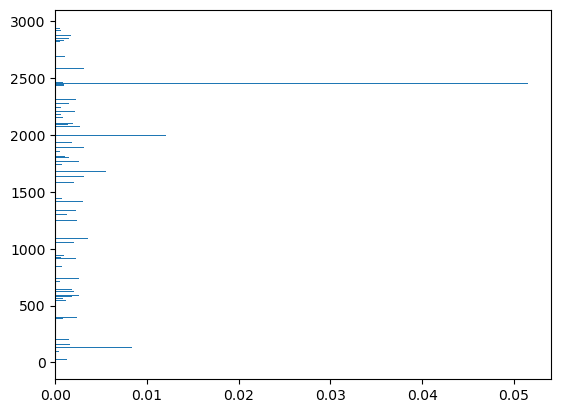

In [64]:
plt.barh(range(X_train.shape[1]), rf.feature_importances_)

Overall measures: 
Correlation - Train: 0.9116319985179231, Test: 0.1784267295094261
MAE - Train:  5.6139968891673115
MAE - Test:  11.027255345265962
R2 - Train:  0.6643706217080096
R2 - Test:  -0.02868593726074309


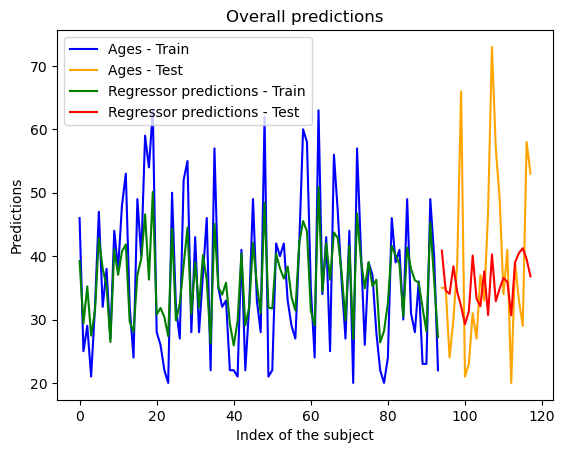

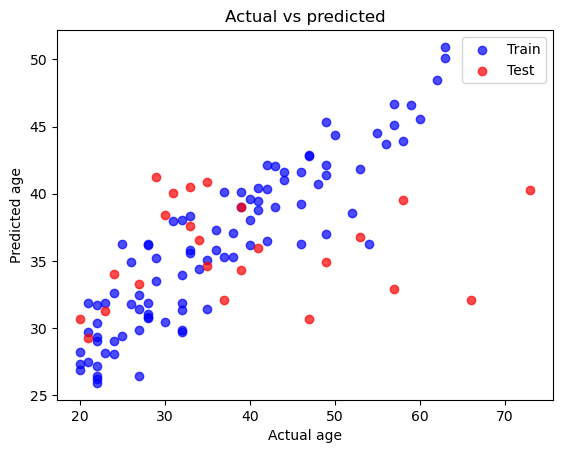

In [65]:
from scipy.stats import pearsonr

pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

print("Overall measures: ")
corr_train, _ = pearsonr(pred_train, y_train)
corr_test, _ = pearsonr(pred_test, y_test)
print(f"Correlation - Train: {corr_train}, Test: {corr_test}")

mae_train = sum(abs(pred_train - y_train)) / len(y_train)
mae_test = sum(abs(pred_test - y_test)) / len(y_test)
print("MAE - Train: ", mae_train)
print("MAE - Test: ", mae_test)

r2_train = rf.score(X_train, y_train)
r2_test = rf.score(X_test, y_test)
print("R2 - Train: ", r2_train)
print("R2 - Test: ", r2_test)

x_train = range(len(indices_train))
x_test = range(len(indices_train), len(indices_train) + len(indices_test))

plt.plot(x_train, y_train, label='Ages - Train', color='blue')
plt.plot(x_test, y_test, label='Ages - Test', color='orange')
plt.plot(x_train, pred_train, label='Regressor predictions - Train', color='green')
plt.plot(x_test, pred_test, label='Regressor predictions - Test', color='red')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.title("Overall predictions")
plt.legend()
plt.show()

plt.scatter(y_train, pred_train, label='Train', color='blue', alpha=0.7)
plt.scatter(y_test, pred_test, label='Test', color='red', alpha=0.7)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.legend()
plt.show()